In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

In [ ]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DESeq2'”
Old packages: 'brio', 'cpp11', 'credentials', 'devtools', 'digest', 'dtplyr',
  'fs', 'glue', 'openssl', 'pkgbuild', 'pkgload', 'readr', 'remotes',
  'sessioninfo', 'stringi', 'testthat', 'usethis', 'vroom', 'withr', 'xml2',
  'Matrix', 'nlme'



In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("DESeq2")
library("pheatmap")

In [ ]:
info <- as.matrix(read.csv("ALL.info", header=TRUE, row.names='sample'))
info

,id,condition
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control


In [ ]:
counts <- as.matrix(read.csv("ALL.counts", header=TRUE, row.names="geneID"))
counts

,r1,r2,r3,c1,c2,c3
ENSMUSG00000000001.4,4489,3919,5700,3431,3504,4031
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,345,273,468,150,136,152
ENSMUSG00000000031.16,64504,33249,64992,55526,48225,56064
ENSMUSG00000000037.17,77,68,87,41,44,52
ENSMUSG00000000049.11,4,1,1,10,8,10
ENSMUSG00000000056.7,641,432,700,716,691,667
ENSMUSG00000000058.6,1012,988,1176,1430,1415,1788
ENSMUSG00000000078.7,4475,3243,4993,5118,5345,5484
ENSMUSG00000000085.16,689,433,765,787,720,647


In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



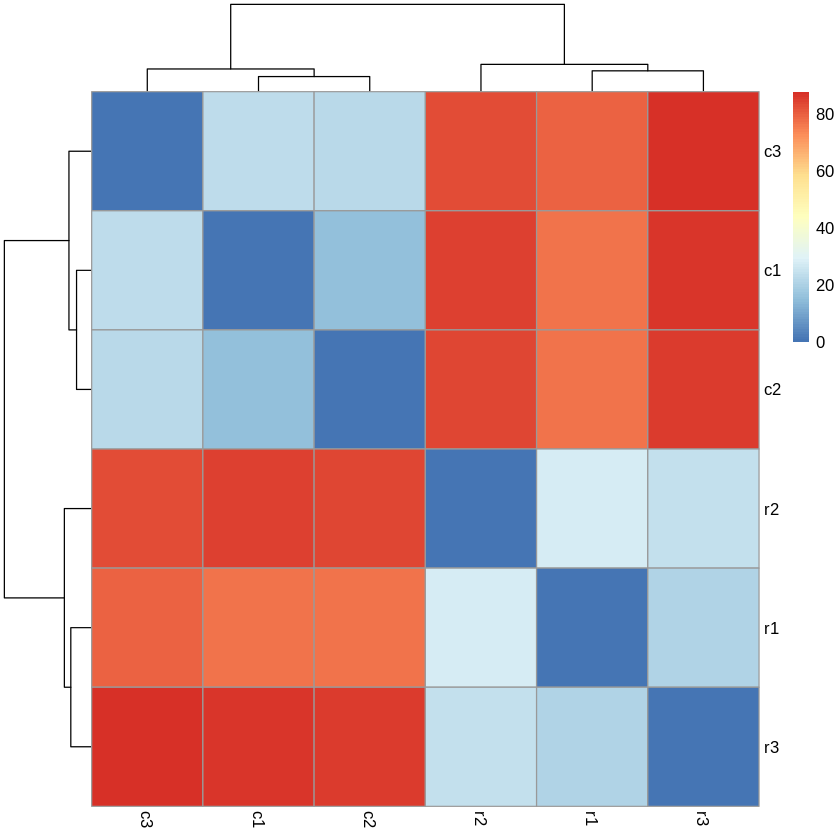

In [ ]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)


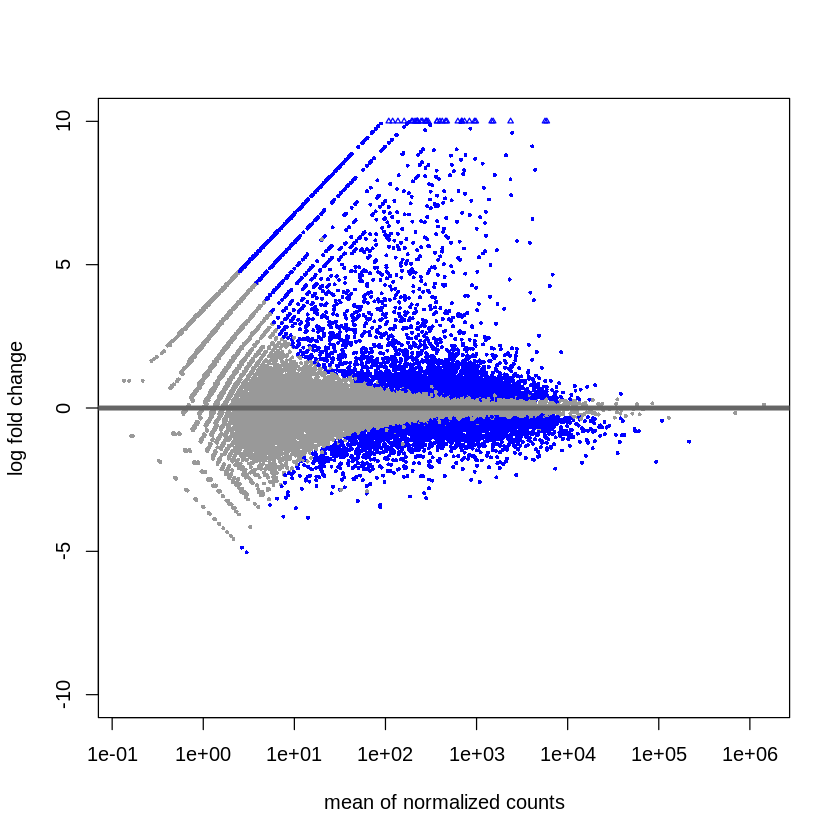

In [ ]:
plotMA(res, ylim=c(-10,10))

In [ ]:
res

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 55406 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
ENSMUSG00000000001.4    4129.4258      0.3371531  0.111884  3.013415
ENSMUSG00000000003.15      0.0000             NA        NA        NA
ENSMUSG00000000028.15    247.9148      1.2670376  0.153460  8.256451
ENSMUSG00000000031.16  52426.1436     -0.0378092  0.123431 -0.306317
ENSMUSG00000000037.17     61.0559      0.7389088  0.266582  2.771790
...                           ...            ...       ...       ...
__no_feature              1429067       0.118294 0.0868388   1.36223
__ambiguous                691904      -0.171666 0.0752471  -2.28137
__too_low_aQual                 0             NA        NA        NA
__not_aligned                   0             NA        NA        NA
__alignment_not_u

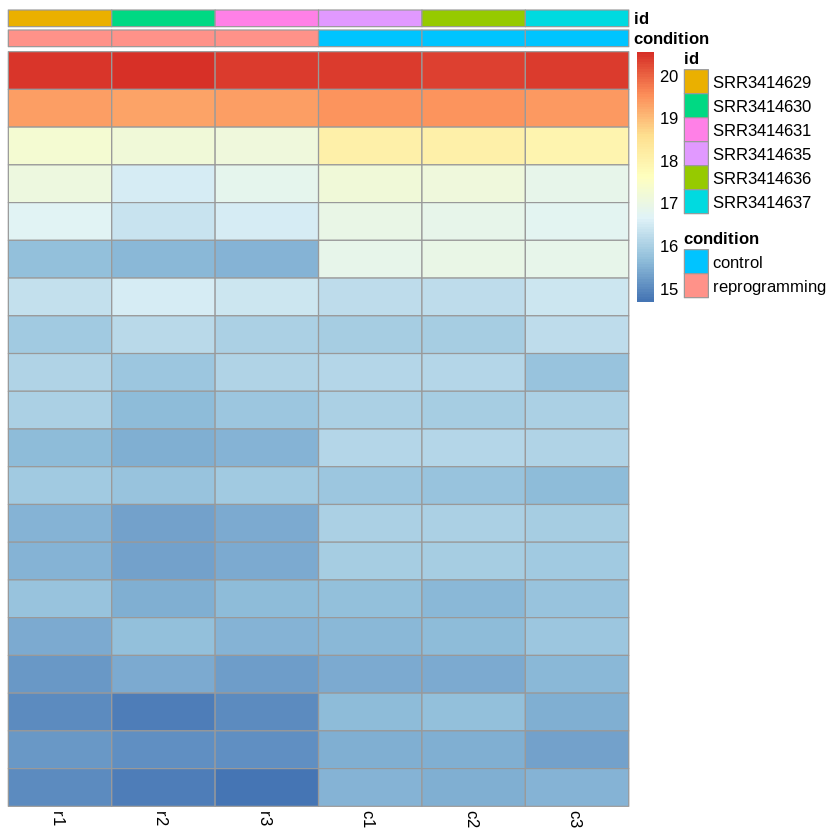

In [ ]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)

In [ ]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

In [ ]:
select

[1] 55402 55403  5409   265  7443 11796 17923 17941 10828  5325  5716  9882
[13]  1964  8315     4 17913 17938 17840  8287  8896

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000026193.15    215764       -1.16949 0.0949098  -12.3222 6.88226e-35
                             padj
                        <numeric>
ENSMUSG00000026193.15 2.80707e-33

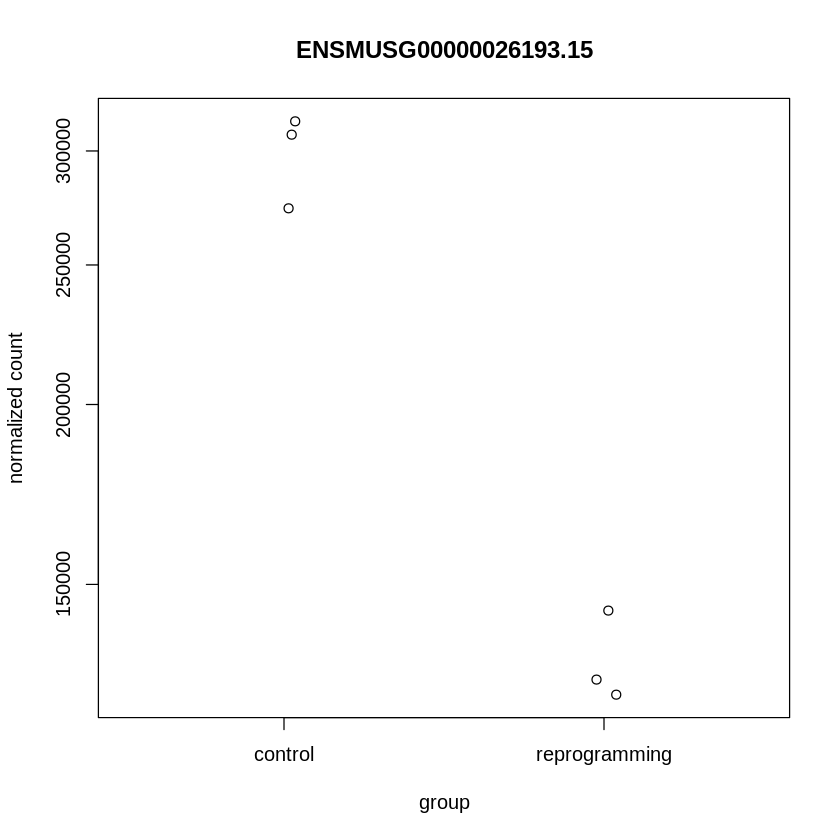

In [ ]:
res[5409,]
plotCounts(dds, gene=5409, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat    pvalue
                      <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000001506.10    128704      -0.337026  0.165024  -2.04228 0.0411241
                           padj
                      <numeric>
ENSMUSG00000001506.10 0.0909506

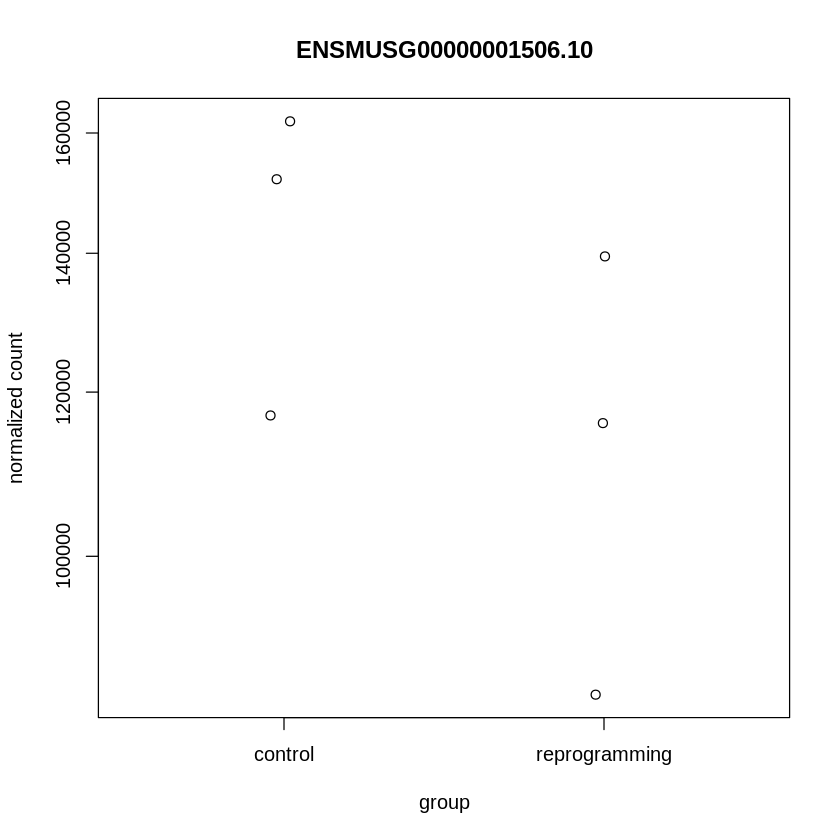

In [ ]:
res[265,]
plotCounts(dds, gene=265, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000029661.16    108586      -0.443848  0.120658  -3.67856 0.000234559
                             padj
                        <numeric>
ENSMUSG00000029661.16 0.000891926

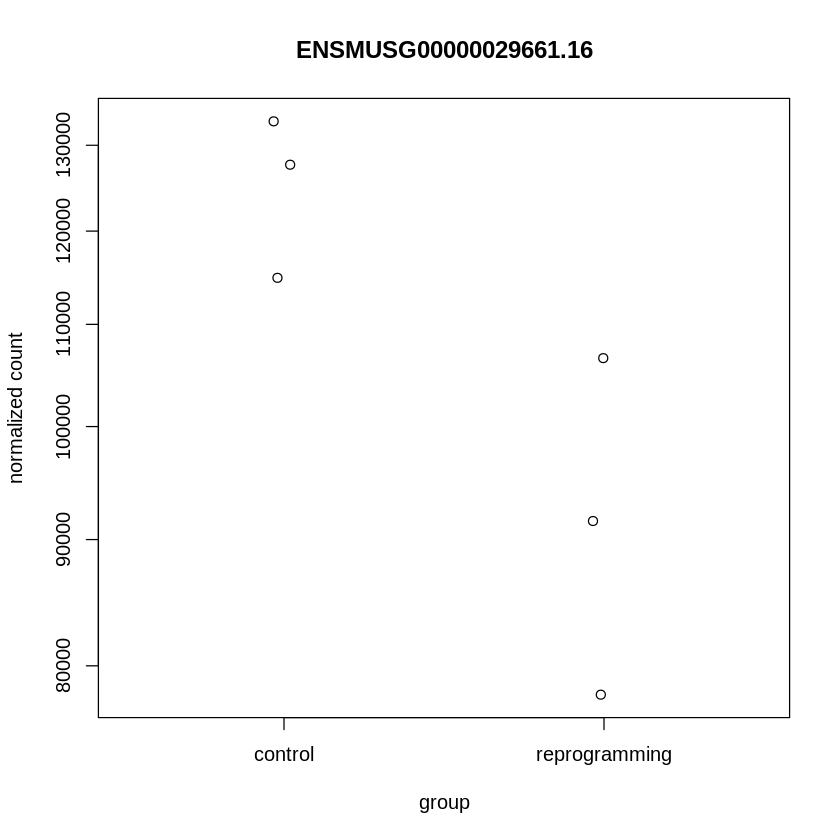

In [ ]:
res[7443,]
plotCounts(dds, gene=7443, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000040152.8   93737.2       -1.87261 0.0981248   -19.084 3.43293e-81
                            padj
                       <numeric>
ENSMUSG00000040152.8 5.52235e-79

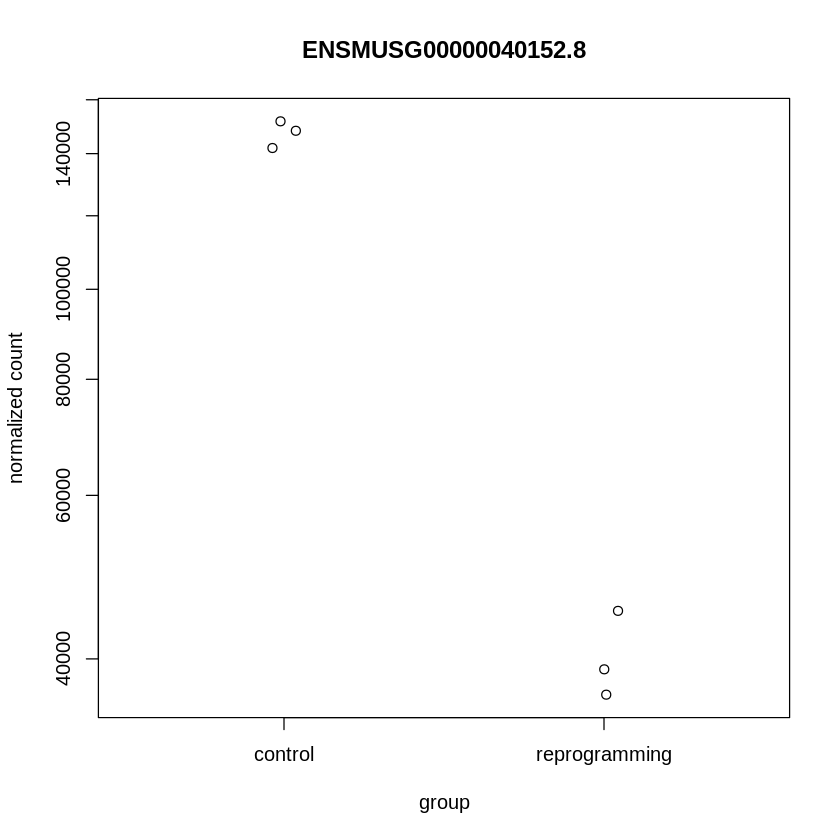

In [ ]:
res[11796,]
plotCounts(dds, gene=11796, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000064351.1   85084.1       0.159423  0.104796   1.52128   0.12819
                          padj
                     <numeric>
ENSMUSG00000064351.1  0.235187

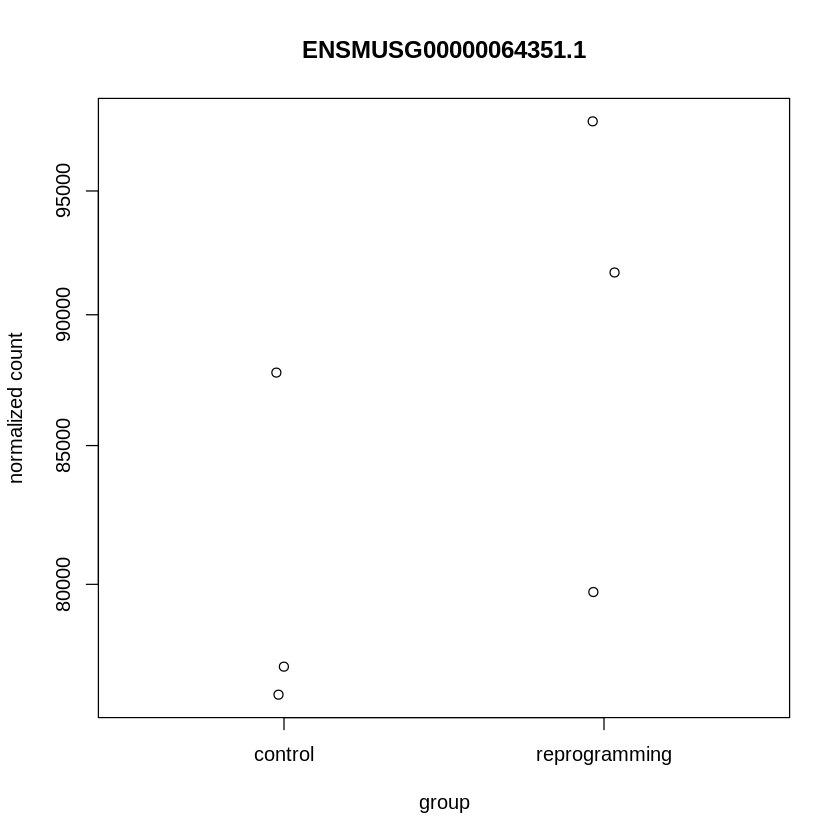

In [ ]:
res[17923,]
plotCounts(dds, gene=17923, intgroup="condition")